<!-- # Setup -->

## Libraries

In [1]:
using DelimitedFiles

In [2]:
include("../Scripts/EchoStateNetworks.jl")
using .EchoStateNetworks
include("../Scripts/ONReservoir.jl")
using .ONReservoir
include("../Scripts/TurningError.jl")
using .TurningError
include("../Scripts/TestingFunctions.jl")
using .TestingFunctions

## Read in Lorenz testing data

In [3]:
lo_train = vec(readdlm("../Data/lorenz_train_0_05.txt"))
lo_test = vec(readdlm("../Data/lorenz_test_0_05.txt"));

## Testing parameters

In [4]:
testing_params = create_testing_params(
    stochastic=true,
    stochastic_rescale_V_rec=true
);

# Multi step predictions

Created reservoir of size: (600,)


Created reservoir of size: (600,)


Overall RMSE:
    Vanilla: 12.926819351386266
    Ordinal network reservoir: 14.397367020610567
Turning partition RMSE:


    Vanilla: 15.470977777137039
    Ordinal network reservoir: 16.618393191915448


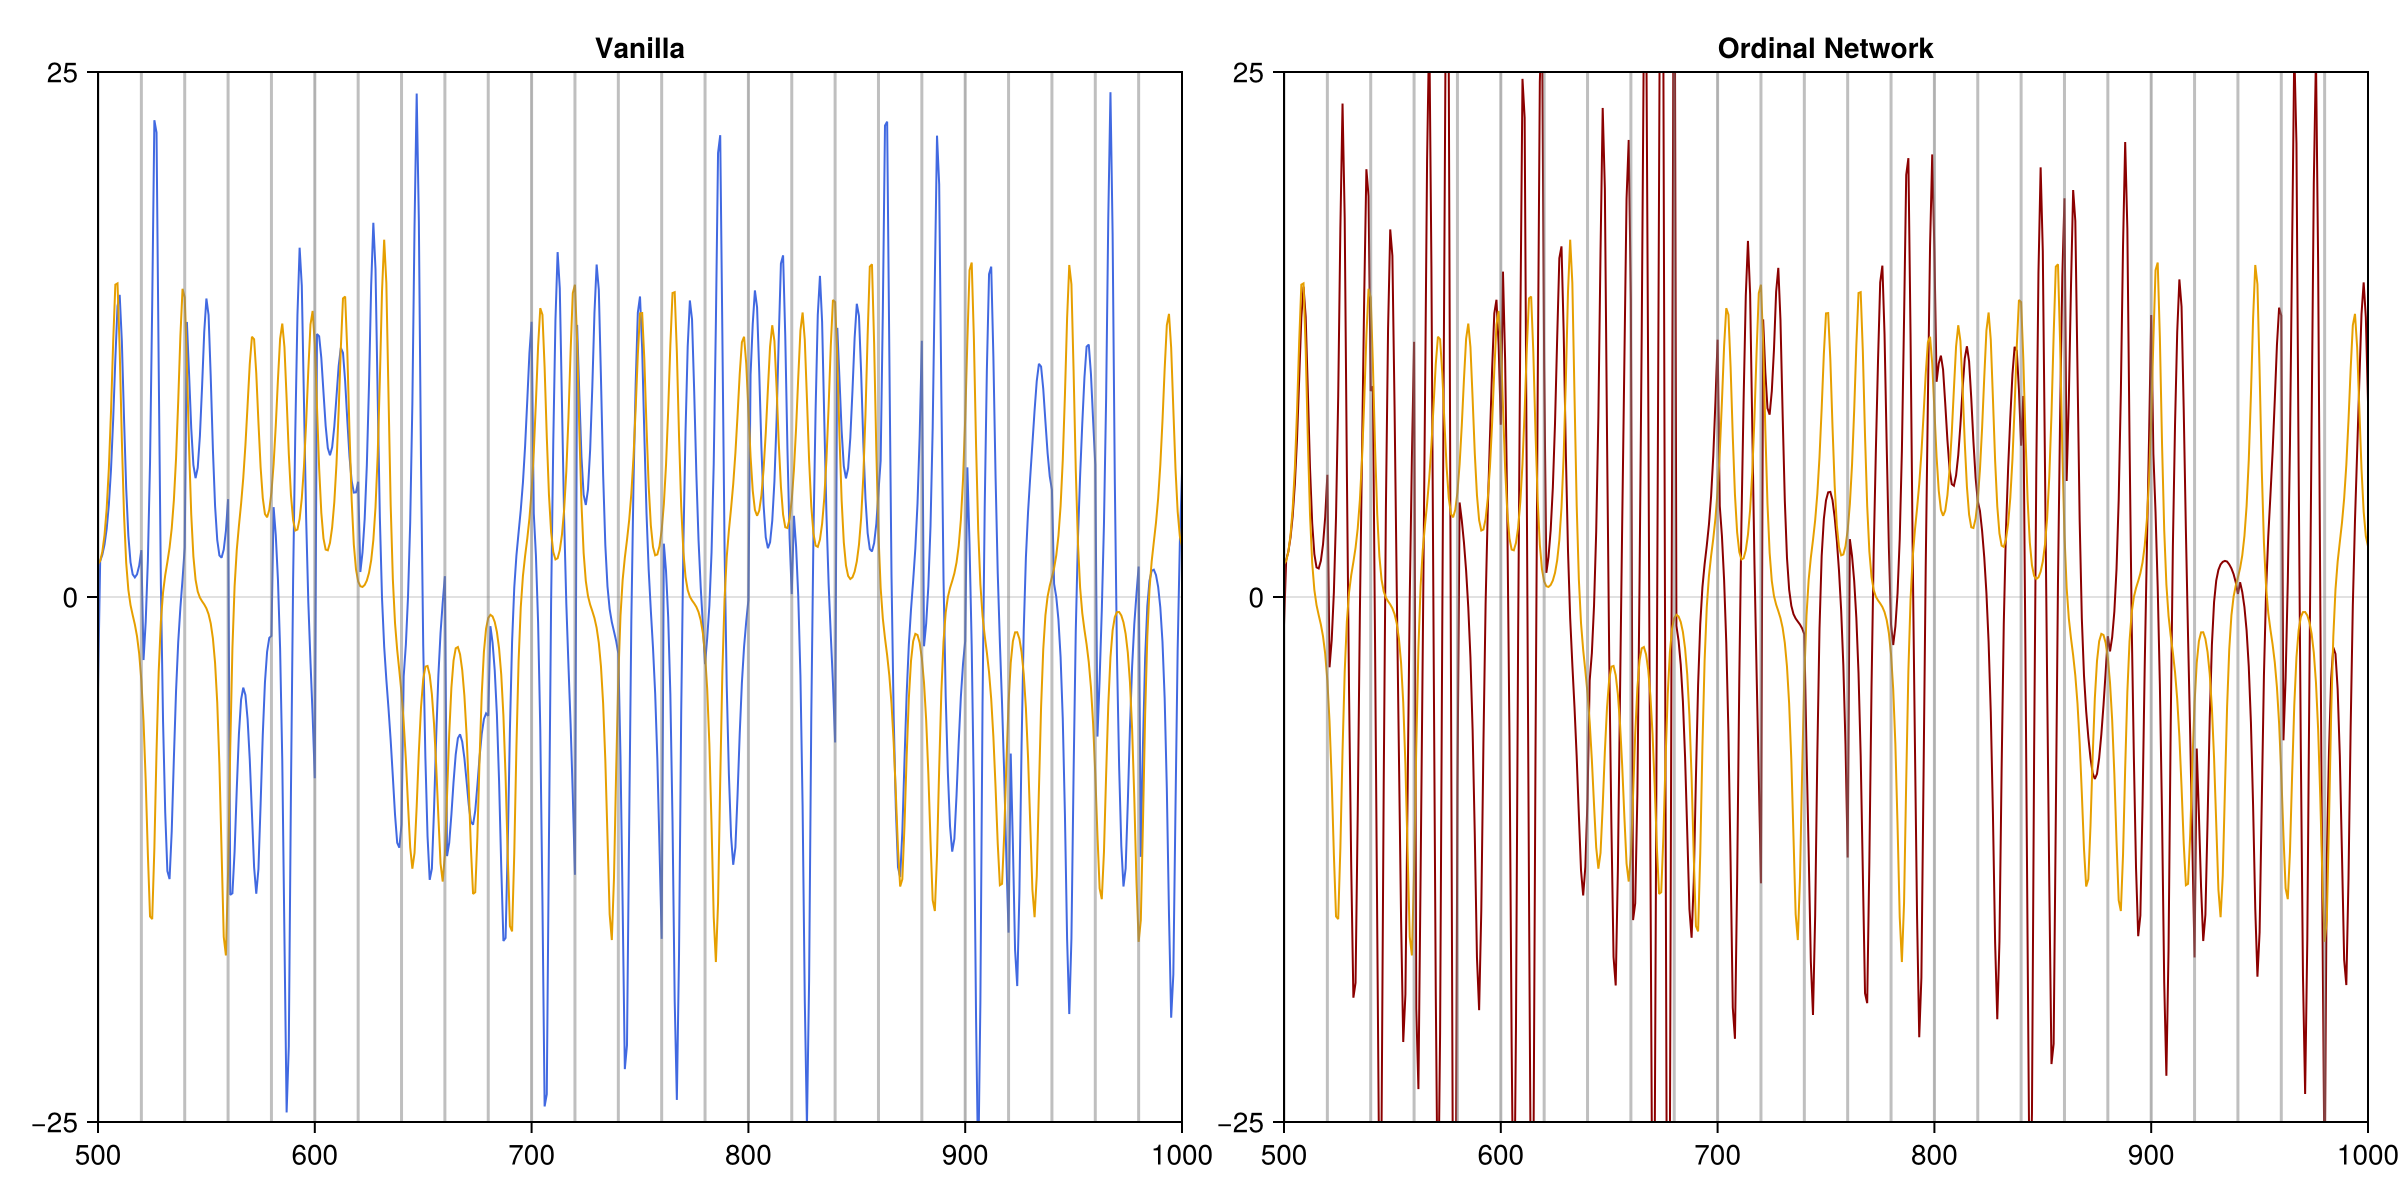

In [5]:
test_multi_step(lo_train, lo_test, 3, 100; n_steps=20, from=500, to=1000, ignore_first=100, testing_params=testing_params)

Created reservoir of size: (600,)


Created reservoir of size: (600,)


Overall RMSE:
    Vanilla: 3.3310771347246457
    Ordinal network reservoir: 3.377306796023965
Turning partition RMSE:
    Vanilla: 1.2480534723504488
    Ordinal network reservoir: 2.7247781380624483


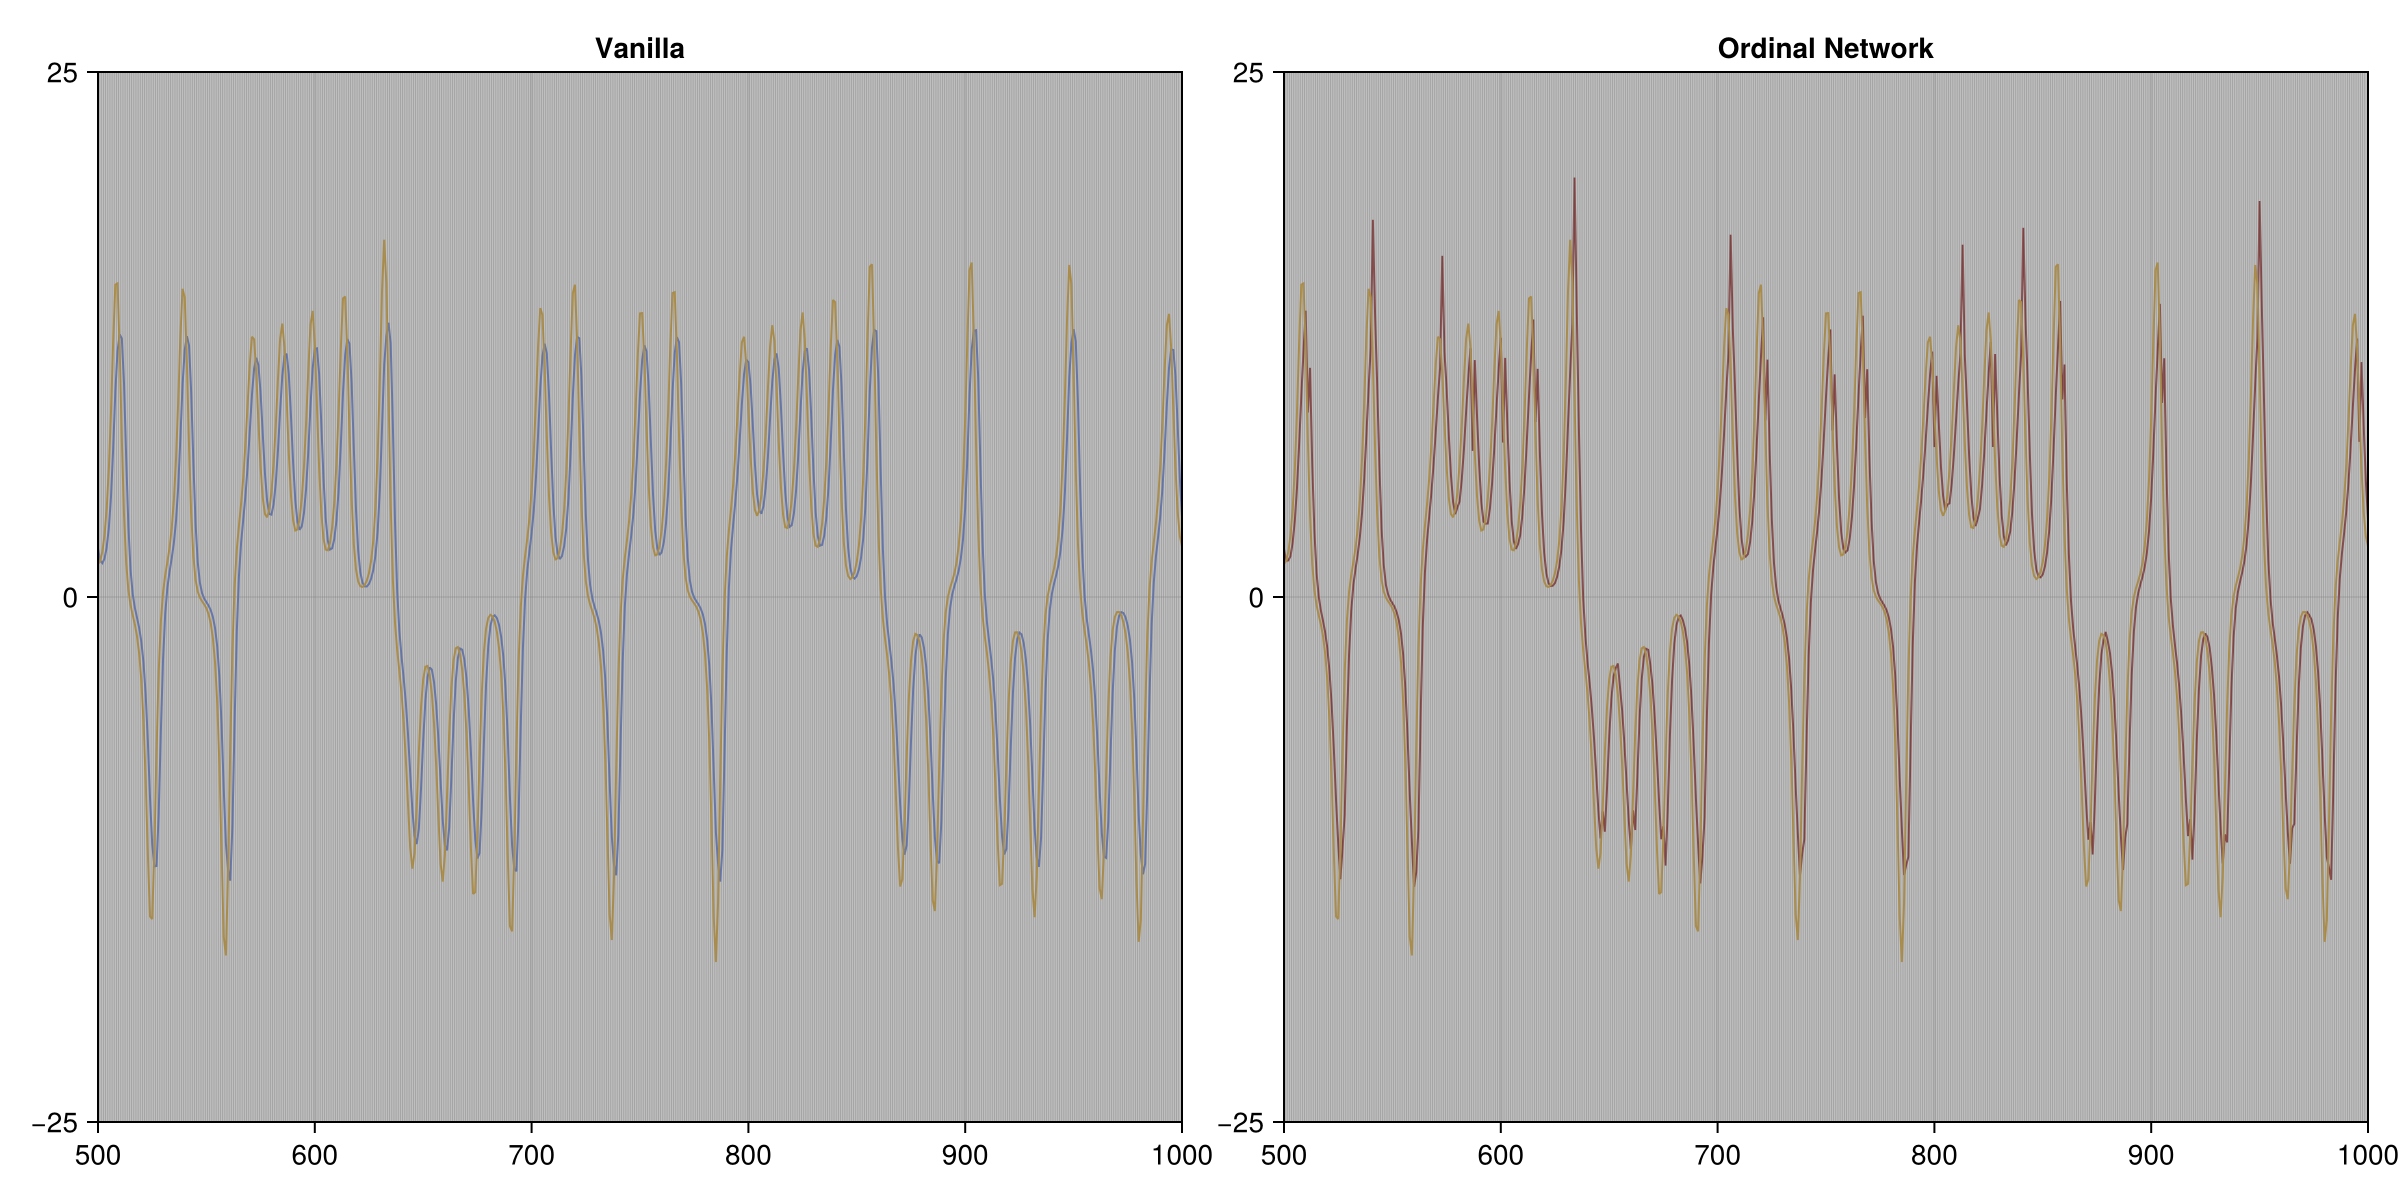

In [6]:
test_multi_step(lo_train, lo_test, 3, 100; n_steps=1, from=500, to=1000, ignore_first=100, testing_params=testing_params)

# Multi step predictions - multi trial RMSE calculation

In [7]:
# test_steps = [1, 2, 3, 5, 10, 20, 30, 40, 50, 70, 100]
test_steps = [1, 2, 3, 5, 10, 15, 20, 30, 40]

9-element Vector{Int64}:
  1
  2
  3
  5
 10
 15
 20
 30
 40

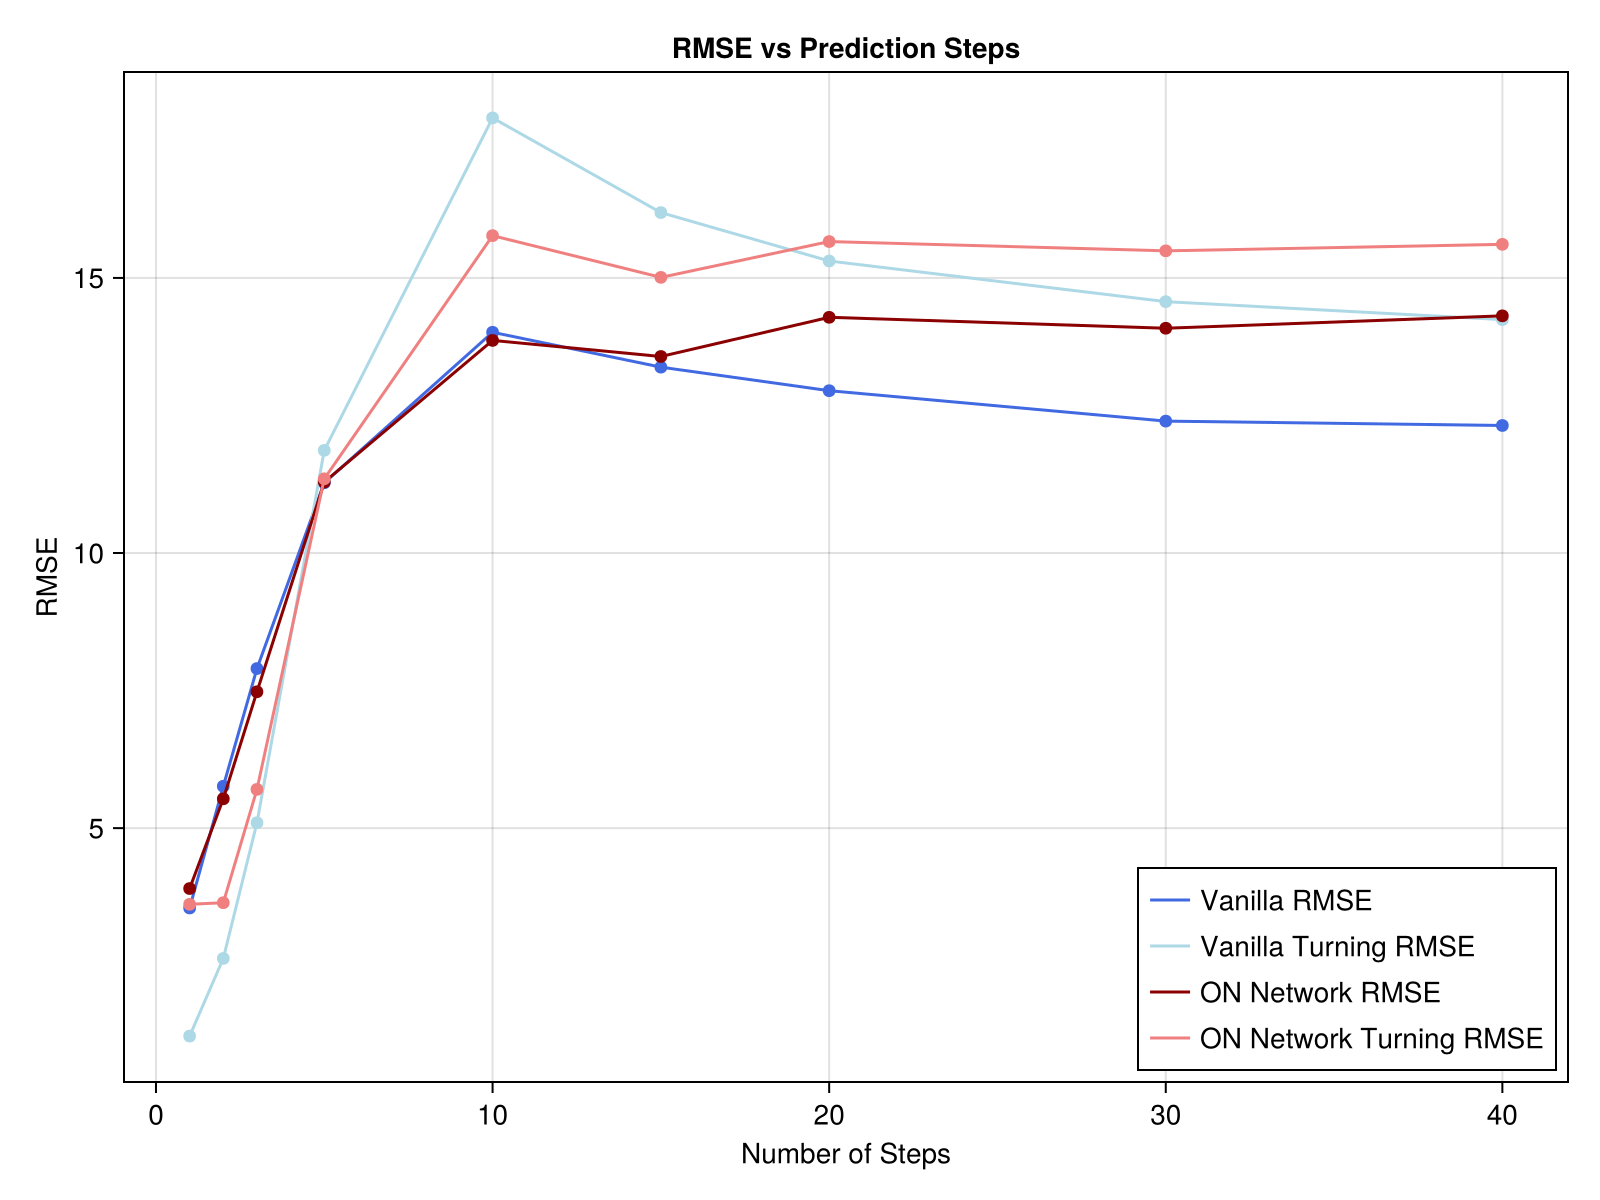

In [8]:
graph_multi_step_RMSE_vs_n_steps(lo_train, lo_test, test_steps, 3, 100; ignore_first=100, trials=30,
    testing_params=testing_params)

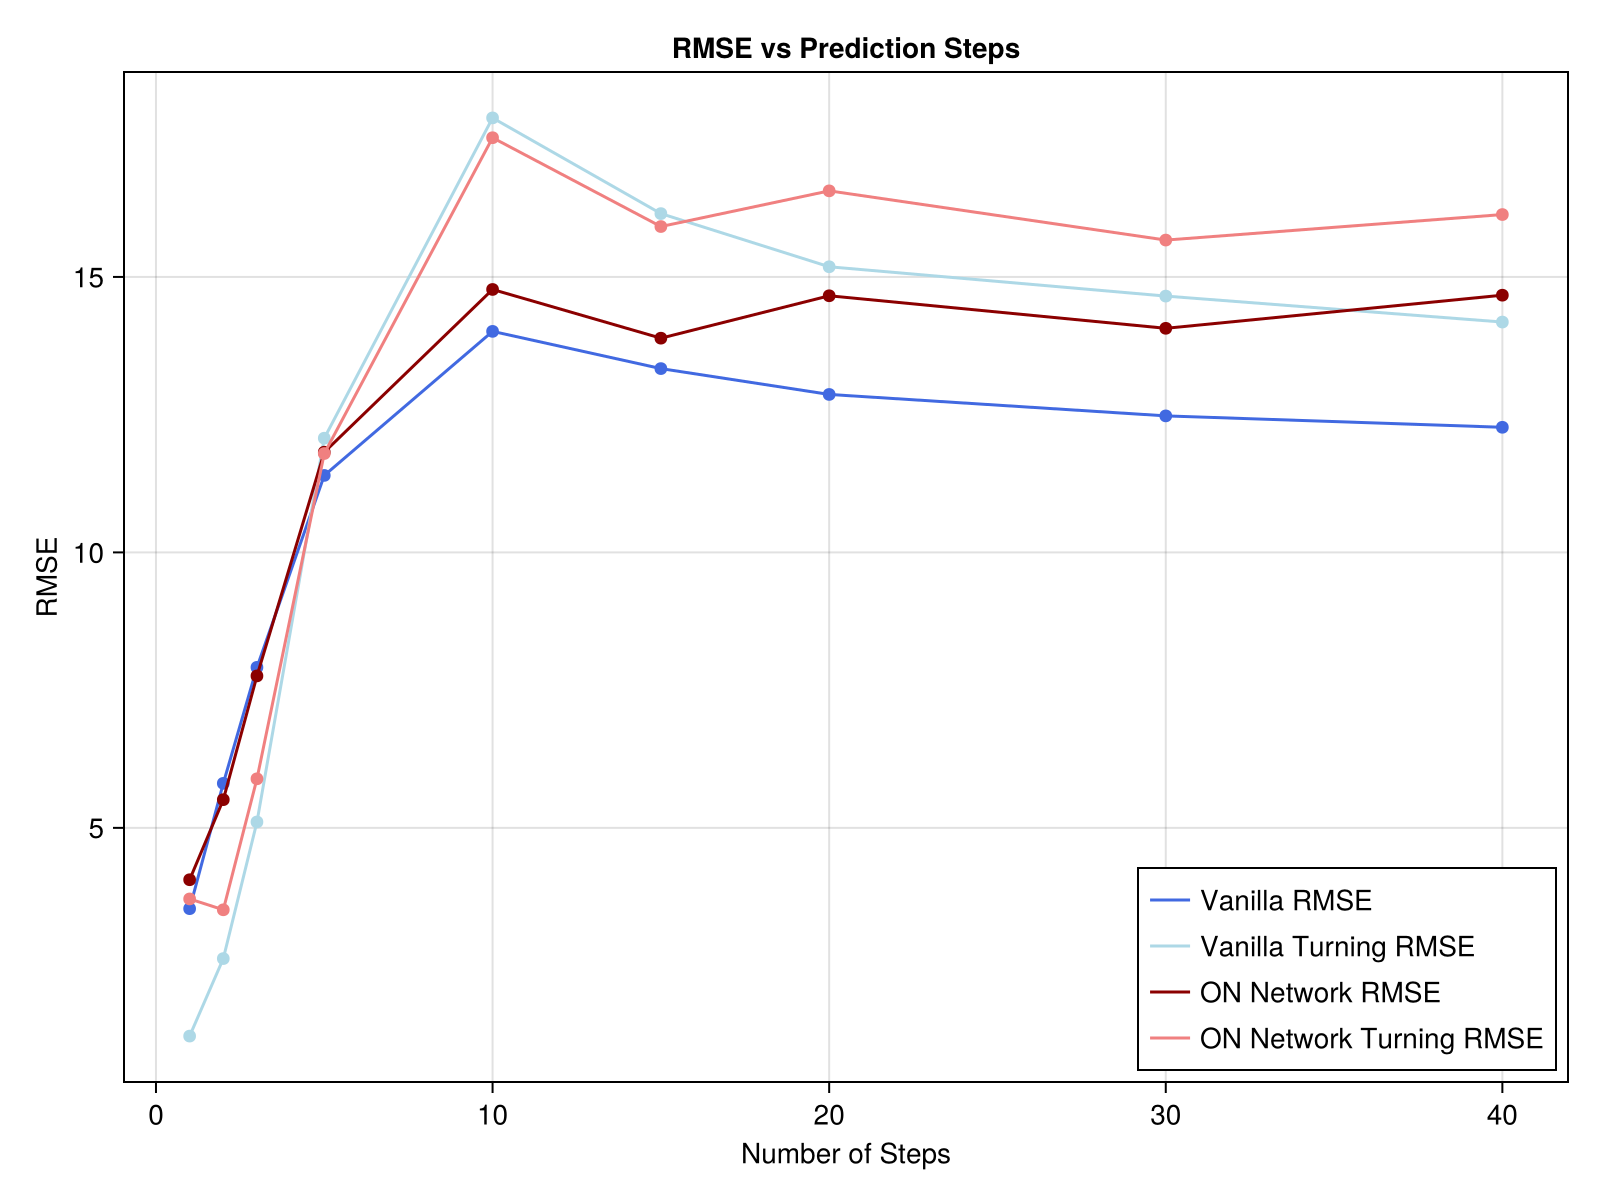

In [9]:
graph_multi_step_RMSE_vs_n_steps(lo_train, lo_test, test_steps, 3, 100; ignore_first=100, trials=30)